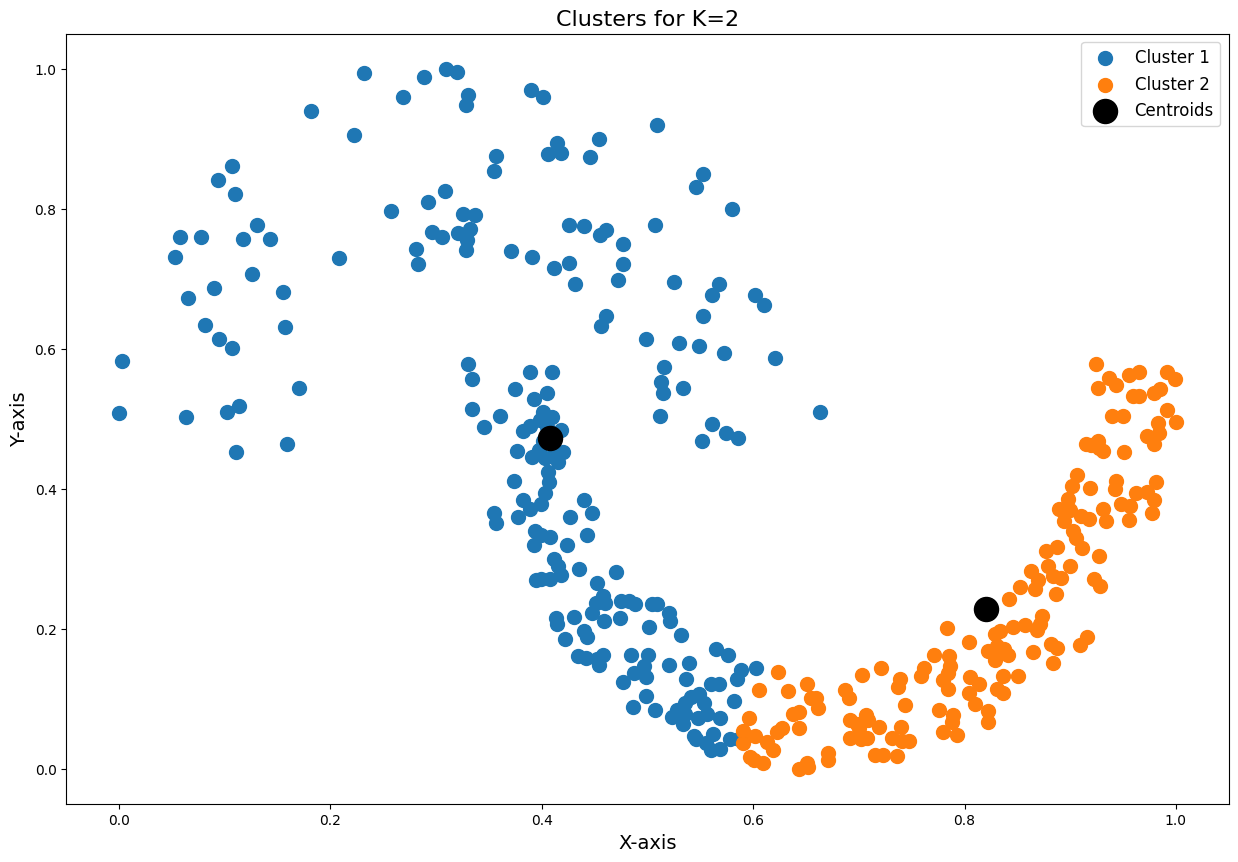

Inertia for K=2: 27.224657342958615


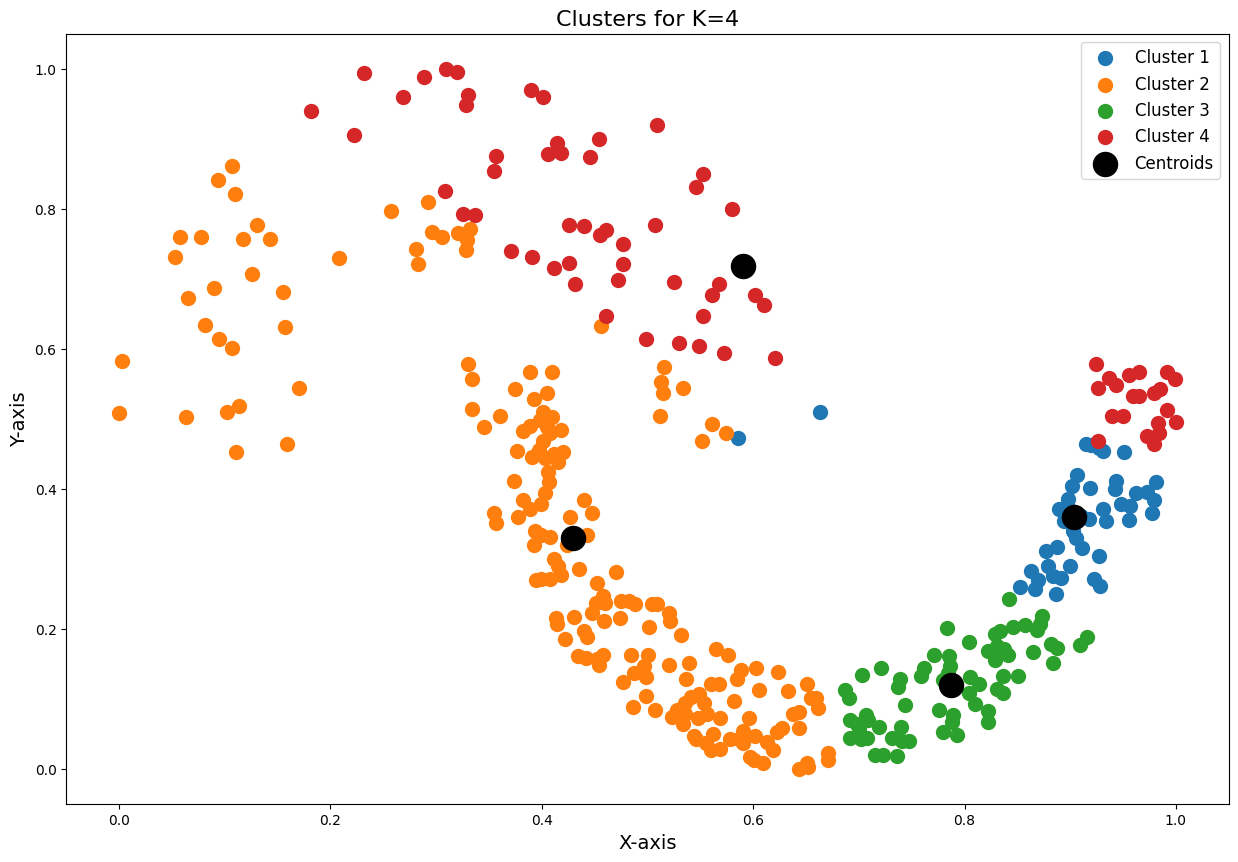

Inertia for K=4: 23.15086895183665


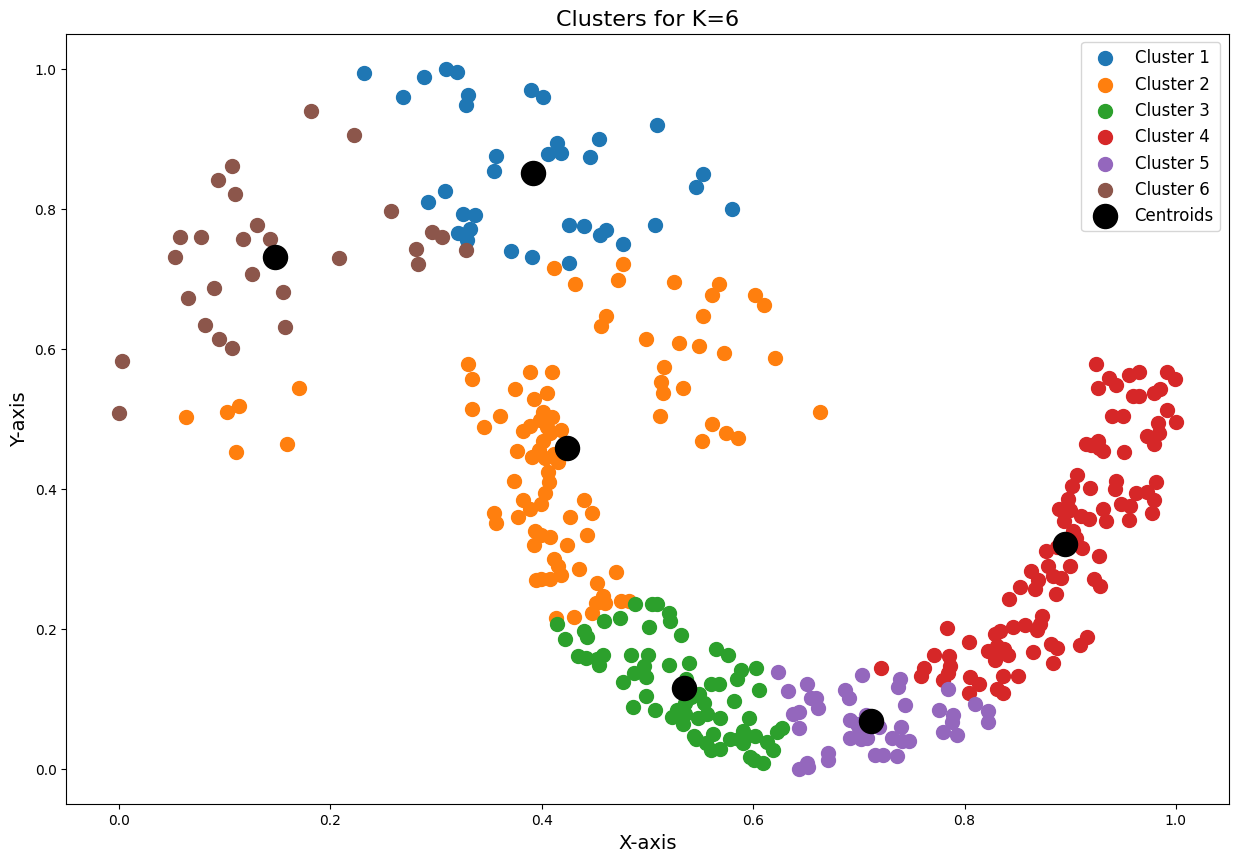

Inertia for K=6: 6.91467302652043


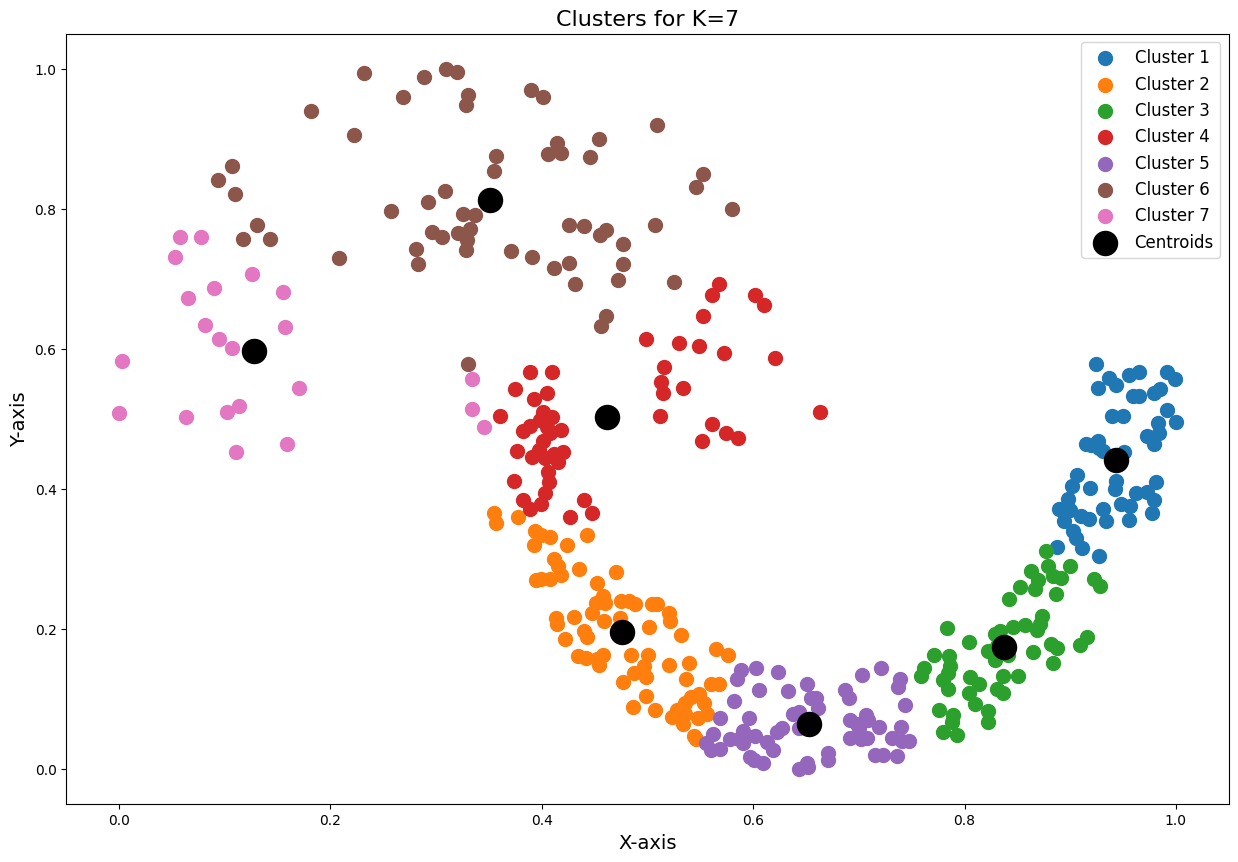

Inertia for K=7: 4.304988678767402


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Own Coding
# ----------------------------------------------
class KMeans:
    def __init__(self, n_clusters, max_iters):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None

    def fit_predict(self, data):
        random_row = random.sample(range(0, data.shape[0]), self.n_clusters)
        self.centroids = data[random_row]

    def fit_predict(self, data):
      random_row = random.sample(range(0, data.shape[0]), self.n_clusters) # Randomly select K rows
      self.centroids = data[random_row] # Initialize centroids with K random rows

      for i in range(self.max_iters):
        # Assign Clusters
        cluster_group = self.assign_clusters(data)
        old_centroids = self.centroids

        # Move centroids
        self.centroids = self.move_centroids(data, cluster_group)

        # Check Finish or not
        if np.all(old_centroids == self.centroids).all():
          break

        return np.array(cluster_group)

    def assign_clusters(self, data):
      cluster_group = []
      distances = []
      for row in data:
        for centroid in self.centroids:
          distances.append(np.sqrt(np.dot(row-centroid, row-centroid))) # Euclidean Distance as Vector Norm
        min_distance = min(distances)
        cluster_position = distances.index(min_distance) # In which cluster the row belongs
        cluster_group.append(cluster_position)
        distances.clear()

      return cluster_group

    def move_centroids(self, data, cluster_group):
        new_centroids = []
        cluster_group = np.array(cluster_group)
        for type in range(self.n_clusters):
            cluster_data = data[cluster_group == type]
            if len(cluster_data) > 0:
                new_centroids.append(np.mean(cluster_data, axis=0))
            else:
                new_centroids.append(random.choice(data))  # Handle empty cluster
        return np.array(new_centroids)




# Make with ChatGPT to visualize beautifully
# ---------------------------------------------

# Load the dataset
data = []
file_path = 'dataset.txt'
with open(file_path, 'r') as file:
    for line in file:
        row = list(map(float, line.strip().split()))
        data.append(row)

data = np.array(data)

# Visualize the clusters and calculate inertia with larger graphs
def plot_clusters(data, km, y_means, k):
    inertia = 0
    plt.figure(figsize=(15, 10))  # Adjust the width and height as needed
    for i in range(k):
        cluster_points = data[y_means == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, label=f'Cluster {i+1}')
        inertia += np.sum((cluster_points - km.centroids[i])**2)  # Calculate inertia
    plt.scatter(km.centroids[:, 0], km.centroids[:, 1], s=300, c='black', label='Centroids')
    plt.title(f'Clusters for K={k}', fontsize=16)
    plt.xlabel('X-axis', fontsize=14)
    plt.ylabel('Y-axis', fontsize=14)
    plt.legend(fontsize=12)
    plt.show()
    print(f"Inertia for K={k}: {inertia}")

# Test for different values of K
for k in [2, 4, 6, 7]:
    km = KMeans(n_clusters=k, max_iters=100)
    y_means = km.fit_predict(data)
    plot_clusters(data, km, np.array(y_means), k)
